In [56]:
import pandas as pd
from matplotlib import pyplot as plt

In [57]:
df = pd.read_csv("../data/okcupid_profiles.csv")

In [58]:
df.drop(columns=['last_online', 'location'], inplace=True)
df.body_type.fillna('no_answer', inplace=True)
df.diet.fillna('no_answer', inplace=True)
df.drinks.fillna('no_answer', inplace=True)
df.drugs.fillna('no_answer', inplace=True)
df.education.fillna('no_answer', inplace=True)
df.height.fillna(68.0, inplace=True)
df.job.fillna('no_answer', inplace=True)
df.drop(columns='income', inplace=True)
df.offspring.fillna('no_answer', inplace=True)
df.pets.fillna('no_answer', inplace=True)
df.religion.fillna('no_answer', inplace=True)
df.sign.fillna('no_answer', inplace=True)
df.smokes.fillna('no_answer', inplace=True)

In [59]:
for val in df.height:
    if df.height.value_counts()[val] == 1:
        df.height.replace(val, 68.0, inplace=True)

In [60]:
for idx, val in enumerate(df.sign):
    df.sign[idx] = val.replace("&rsquo;", "")

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
df['sign_actual'] = df['sign']
df['sign_seriousness'] = df['sign']
for idx, val in enumerate(df.sign):
    if len(val.split()) == 1:
        df['sign_actual'][idx] = val
        df['sign_seriousness'][idx] = 'no_answer'
    else: 
        df['sign_actual'][idx] = val.split(" ", 1)[0]
        df['sign_seriousness'][idx] = val.split(" ", 1)[1]

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/

In [62]:
df['religion_actual'] = df['religion']
df['religion_seriousness'] = df['religion']
for idx, val in enumerate(df.religion):
    if len(val.split()) == 1:
        df['religion_actual'][idx] = val
        df['religion_seriousness'][idx] = 'no_answer'
    else: 
        df['religion_actual'][idx] = val.split(" ", 1)[0]
        df['religion_seriousness'][idx] = val.split(" ", 1)[1]

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/kevin/opt/anaconda3/li

In [63]:
df = df[df["sign"].str.contains("no_answer")==False]

In [68]:
df.ethnicity

0               asian, white
1                      white
2                        NaN
3                      white
4        asian, black, other
                ...         
59941                    NaN
59942           white, other
59943                  asian
59944           asian, black
59945                  white
Name: ethnicity, Length: 48890, dtype: object

In [64]:
df.to_csv('../data/mostly_cleaned.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48890 entries, 0 to 59945
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   48890 non-null  int64  
 1   status                48890 non-null  object 
 2   sex                   48890 non-null  object 
 3   orientation           48890 non-null  object 
 4   body_type             48890 non-null  object 
 5   diet                  48890 non-null  object 
 6   drinks                48890 non-null  object 
 7   drugs                 48890 non-null  object 
 8   education             48890 non-null  object 
 9   ethnicity             44945 non-null  object 
 10  height                48890 non-null  float64
 11  job                   48890 non-null  object 
 12  offspring             48890 non-null  object 
 13  pets                  48890 non-null  object 
 14  religion              48890 non-null  object 
 15  sign               

<BarContainer object of 12 artists>

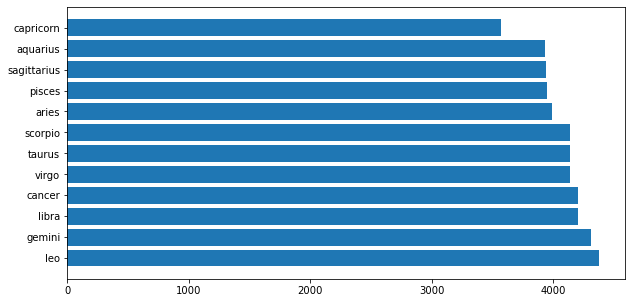

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(df.sign_actual.value_counts().index, df.sign_actual.value_counts().values )